In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
from cycler import cycler
def set_plot():
    plt.rcParams["axes.facecolor"] = '#0d1117'
    plt.rcParams["figure.facecolor"] = '#0d1117'

    # plt.rcParams['figure.figsize'] = [7.0, 3.0]
    plt.rcParams['figure.dpi'] = 100

    # plt.rcParams["axes.spines.bottom.color"]
    # plt.rcParams["axes.spines.left"] = '#0d1117'
    plt.rcParams["axes.spines.right"] = False
    plt.rcParams["axes.spines.top"] = False

    plt.rcParams["axes.edgecolor"] = "#eef7f4"

    plt.rcParams["xtick.color"] = '#eef7f4'
    plt.rcParams["ytick.color"] = '#eef7f4'


    plt.rcParams["axes.labelcolor"] = '#eef7f4'

    plt.rcParams["grid.color"] = '#eef7f4'

    plt.rcParams["legend.frameon"] = False

    plt.rcParams['axes.prop_cycle'] = cycler(color=['g', 'r', 'b', 'y'])

    plt.rcParams['axes.titlecolor'] = 'w'

set_plot()

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
train, test = pd.read_csv("../../qmof_datasets/minmax/train.csv", index_col=0), pd.read_csv("../../qmof_datasets/minmax/test.csv", index_col=0)

In [5]:
device = torch.device("cuda")

In [6]:
dataset = torch.Tensor(np.array([*train.values, *test.values])).to(device)

In [7]:
def plot_hist(path: str):
    model = torch.load(path)
    reduced_qmof = model.encoder(dataset).cpu().detach().numpy()
    pd.DataFrame(reduced_qmof).hist(figsize=(16, 9), bins=20)

    tsne = TSNE(n_components=2)

    reduced_dim_data_tsne = tsne.fit_transform(reduced_qmof)
    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7)) 
    ax1.scatter(reduced_dim_data_tsne[:reduced_qmof.shape[0],0], reduced_dim_data_tsne[:reduced_qmof.shape[0],1])
    #plt.scatter(reduced_dim_data_tsne[reduced_qmof.shape[0]:,0], reduced_dim_data_tsne[reduced_qmof.shape[0]:,1], c=["r" if t==1. else "b" for t in y.values])
    ax1.set_title('Visualization of AE Latent Space with t-SNE', color="w")

    pca = PCA(n_components=2)

    reduced_dim_data_pca = pca.fit_transform(reduced_qmof)

    ax2.scatter(reduced_dim_data_pca[:reduced_qmof.shape[0],0], reduced_dim_data_pca[:reduced_qmof.shape[0],1])
    #plt.scatter(reduced_dim_data_tsne[reduced_qmof.shape[0]:,0], reduced_dim_data_tsne[reduced_qmof.shape[0]:,1], c=["r" if t==1. else "b" for t in y.values])
    ax2.set_title('Visualization of AE Latent Space with PCA', color="w")

    

    return reduced_qmof

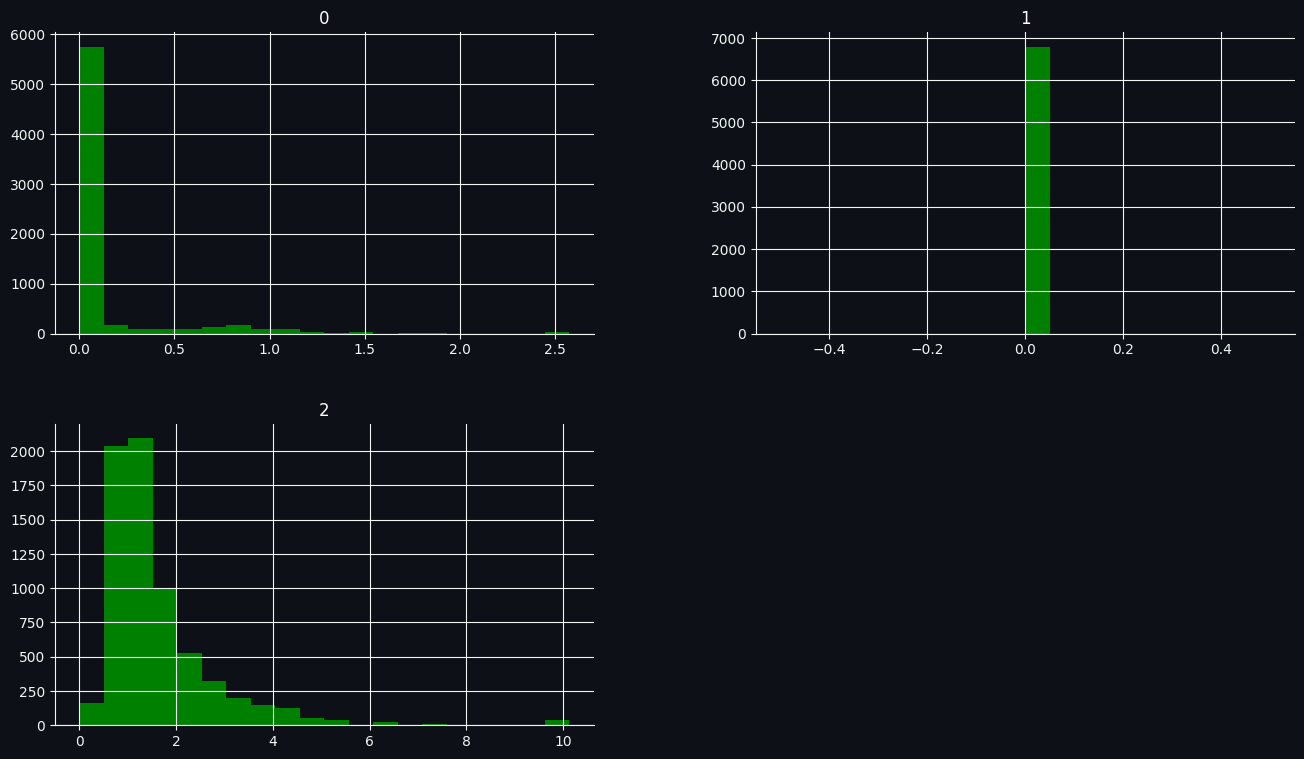

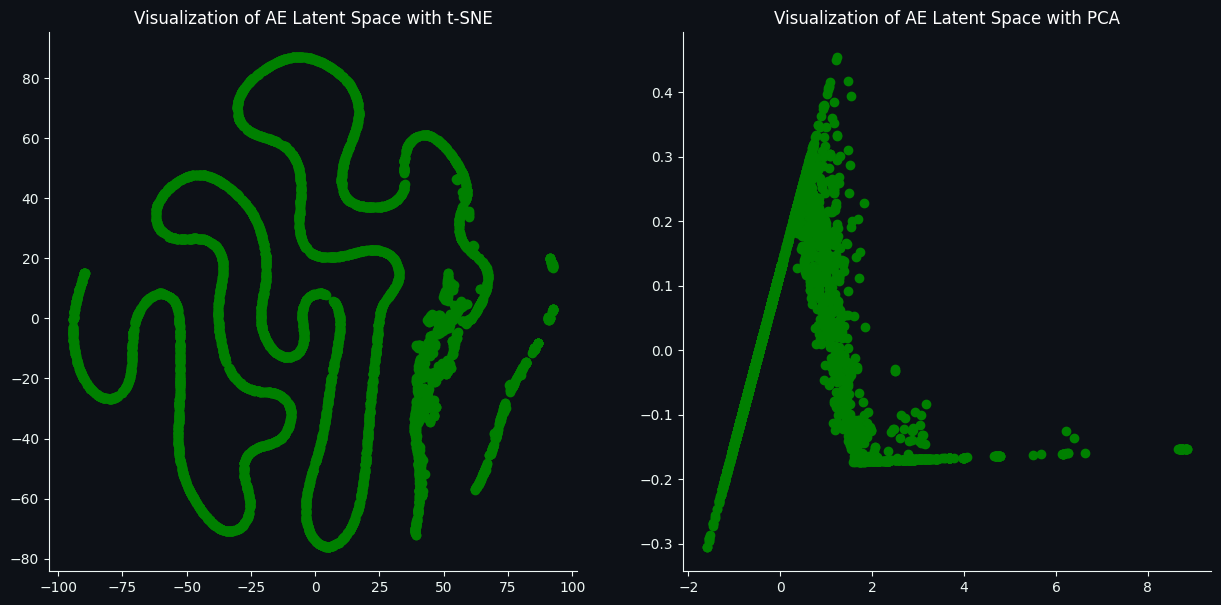

In [8]:
dim3 = plot_hist("../../ae_150_lsp_3.pth")

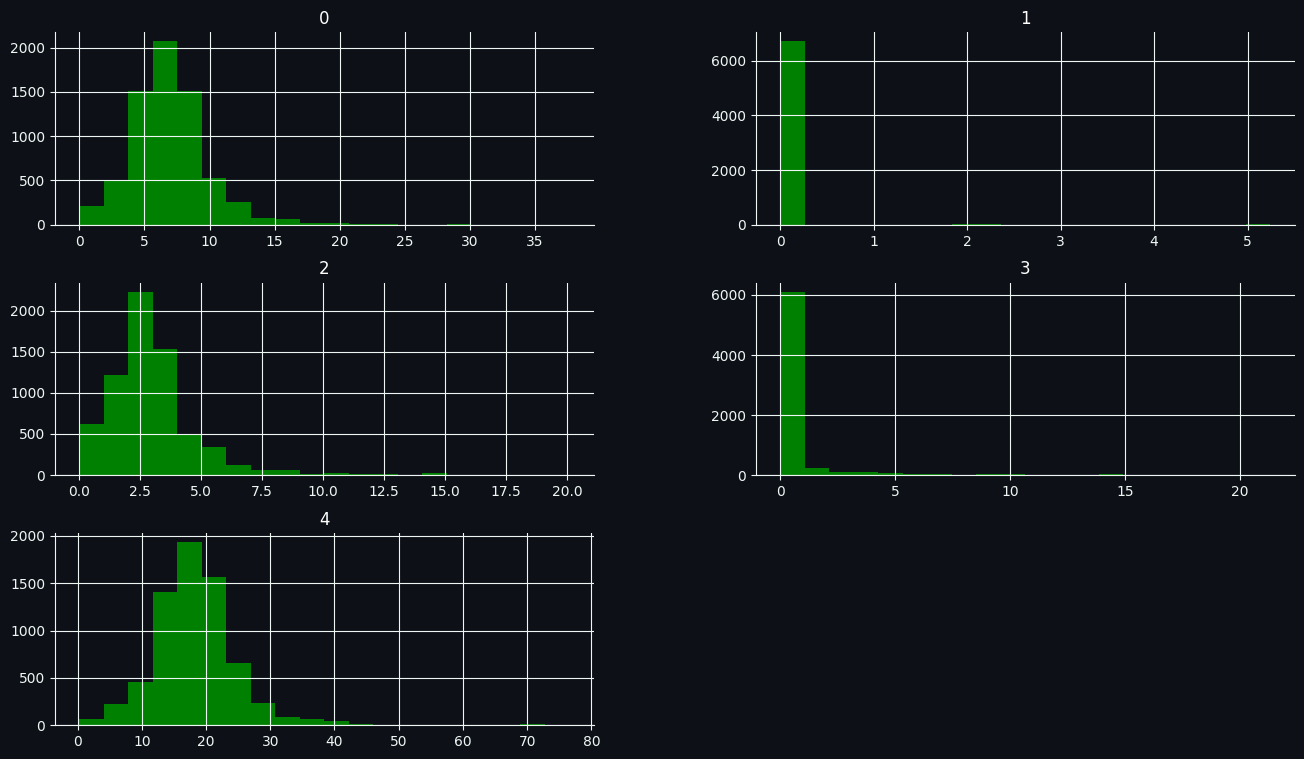

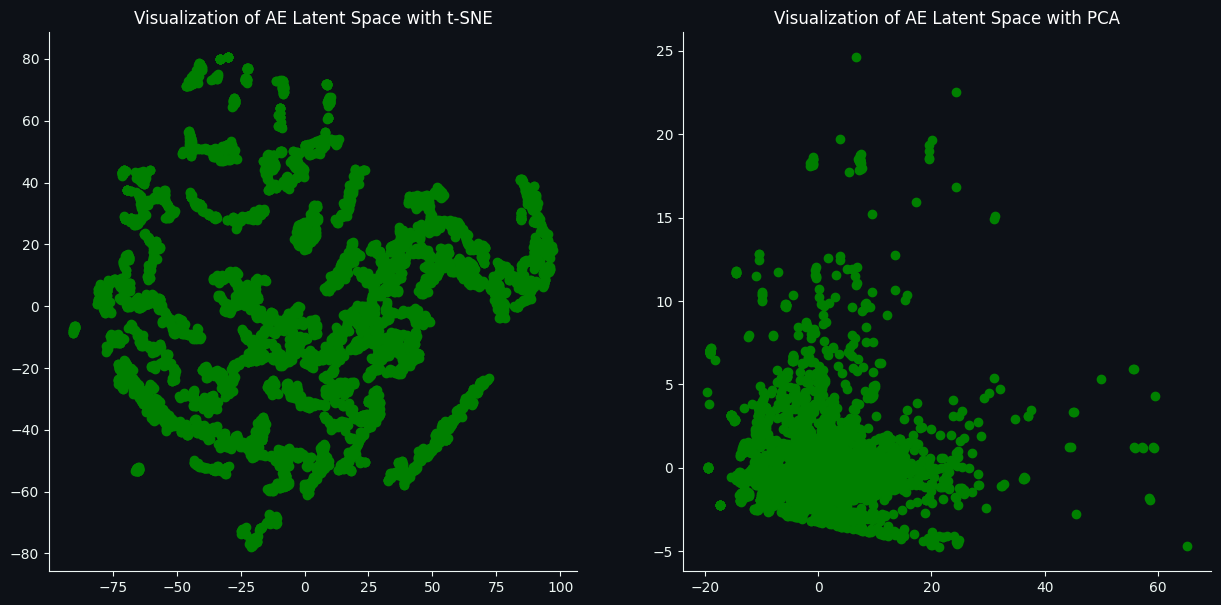

In [19]:
dim3 = plot_hist("../../ae_150_lsp_5.pth")

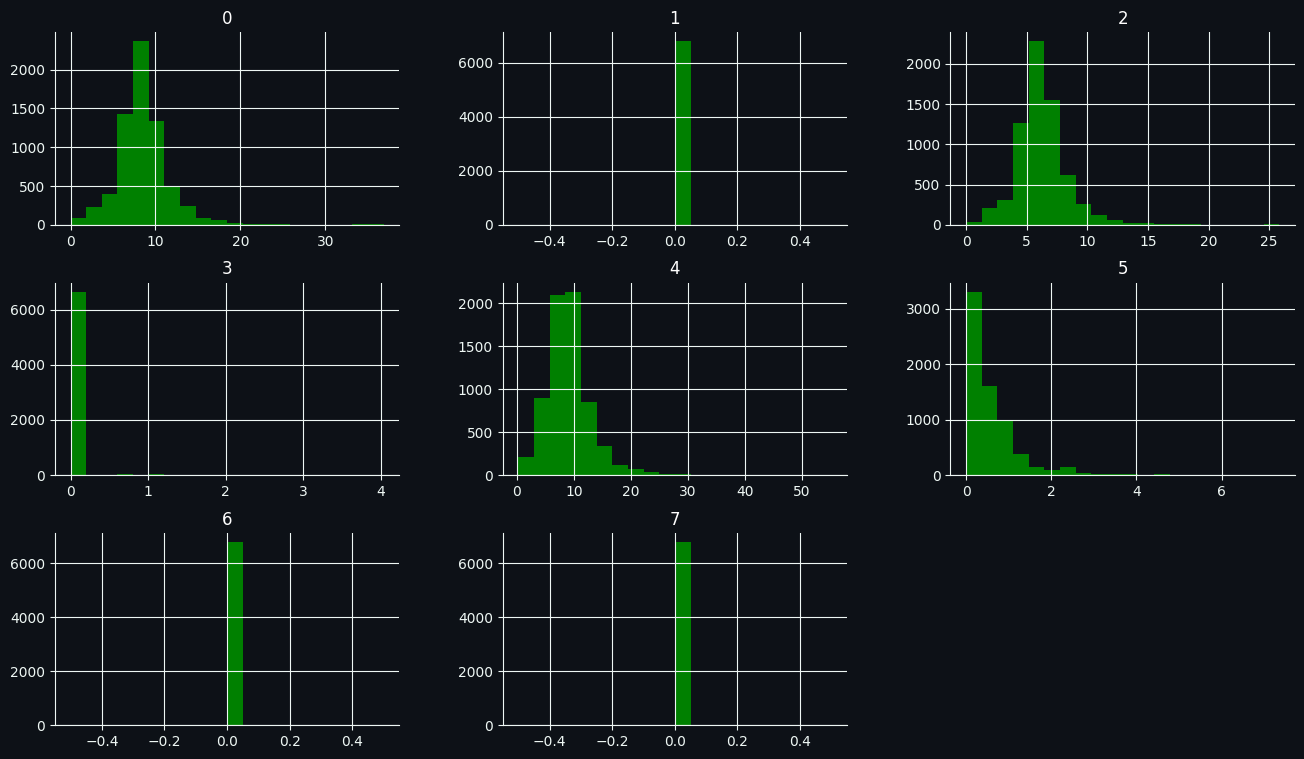

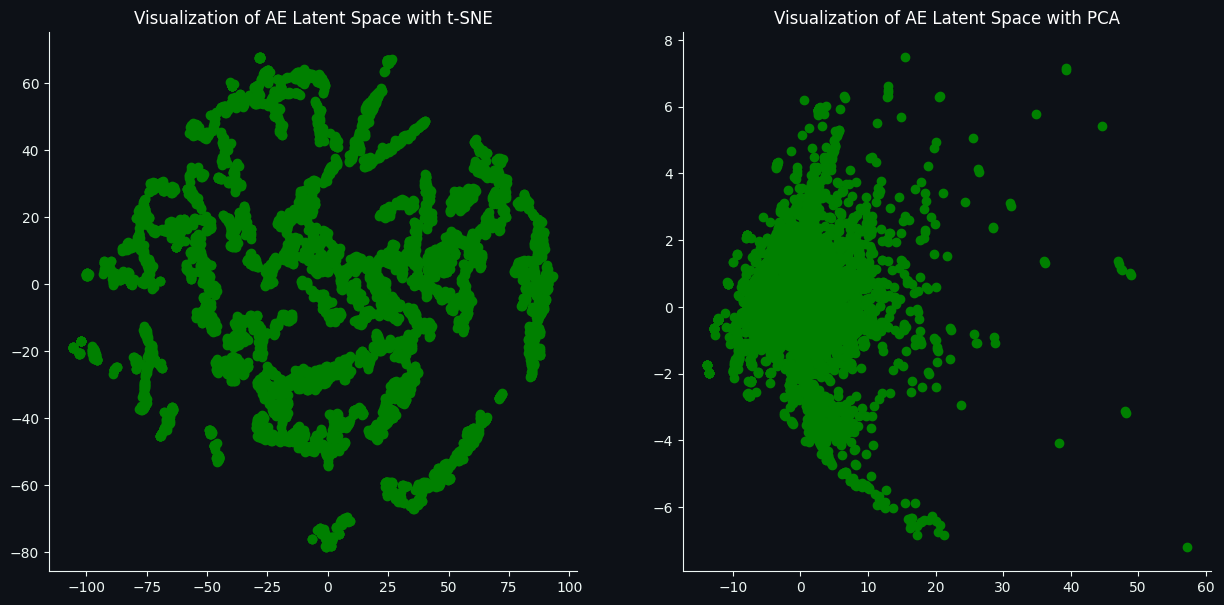

In [20]:
dim3 = plot_hist("../../ae_150_lsp_8.pth")

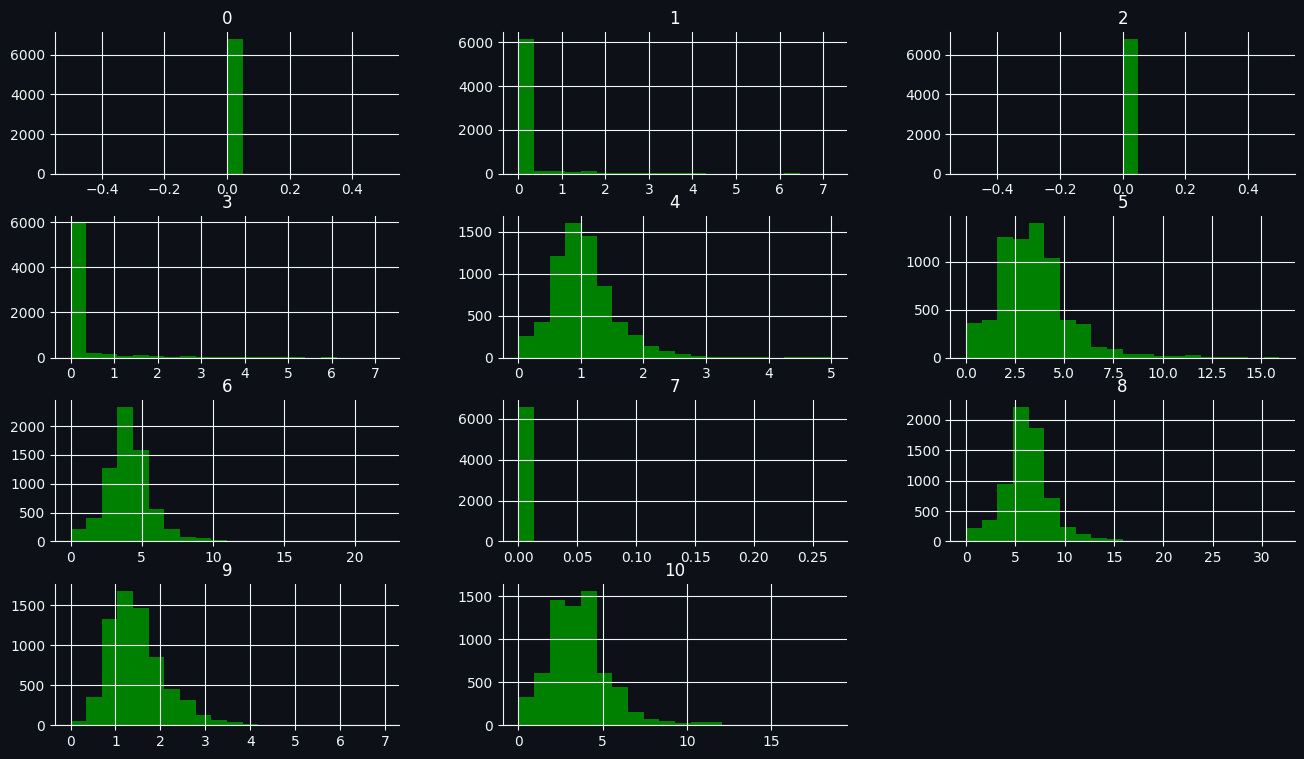

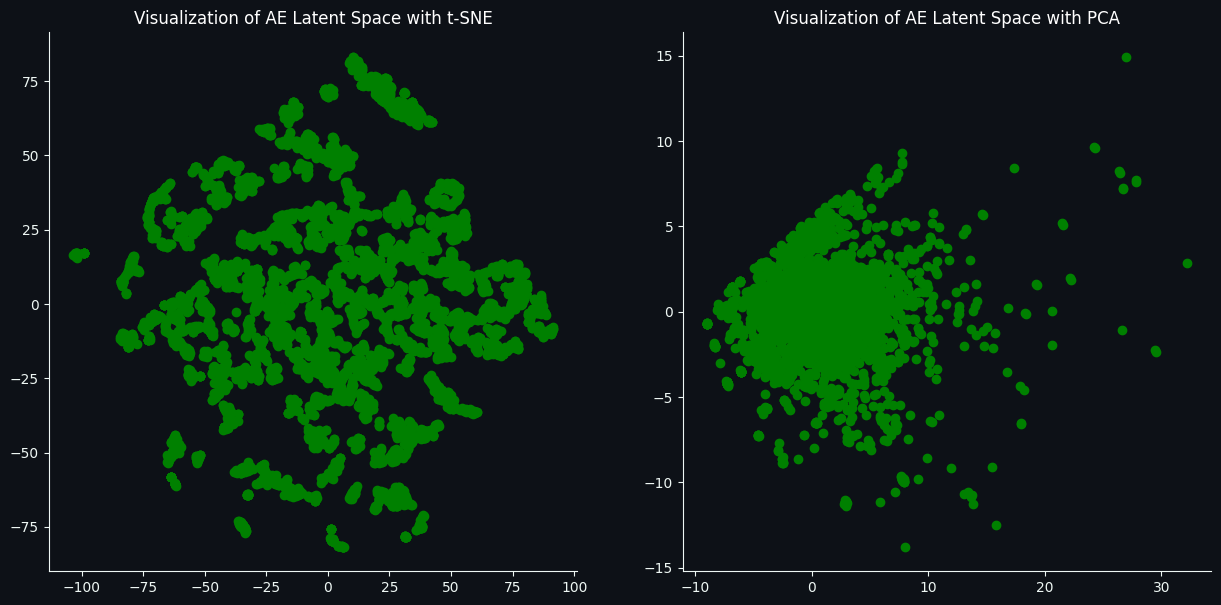

In [21]:
dim3 = plot_hist("../../ae_150_lsp_11.pth")

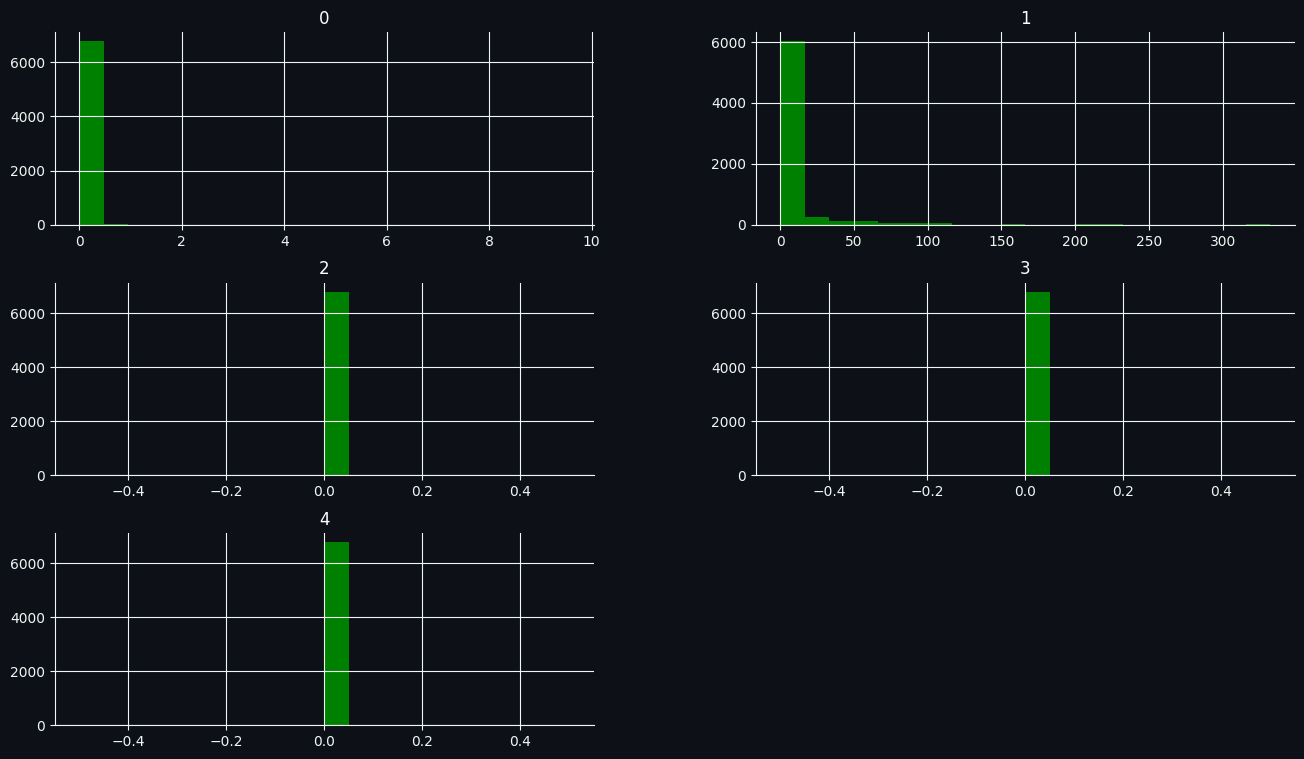

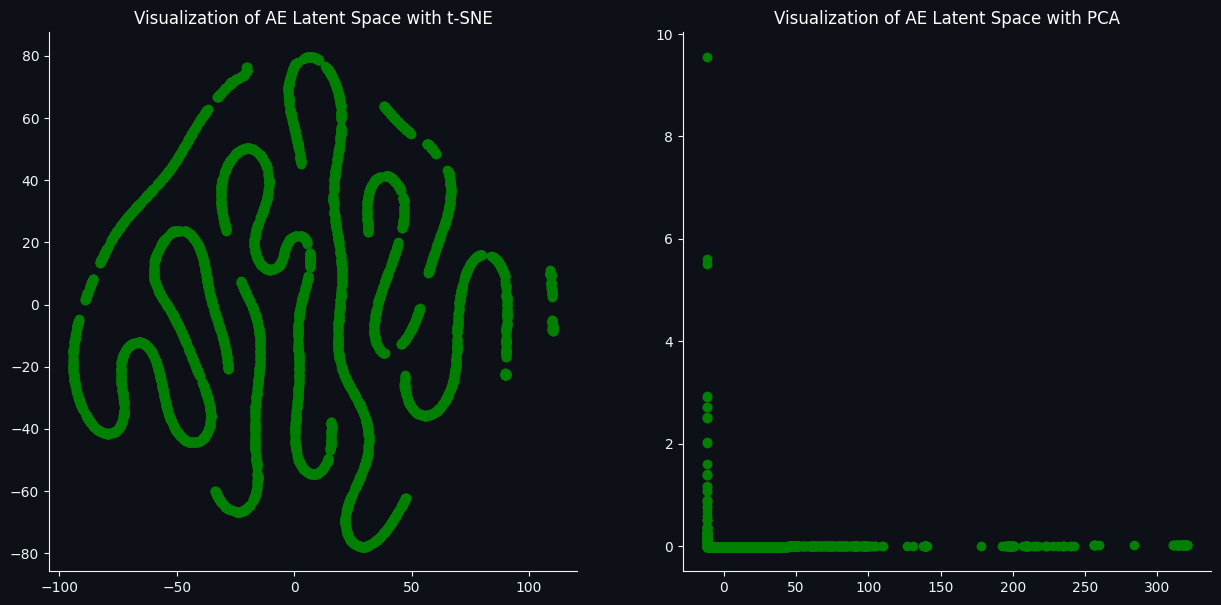

In [23]:
dim3 = plot_hist("../../ae_200_lsp_5.pth")

In [14]:
dim3

array([[0.       , 6.30823  , 0.       , 0.       , 0.       ],
       [0.       , 6.1900973, 0.       , 0.       , 0.       ],
       [0.       , 6.7351294, 0.       , 0.       , 0.       ],
       ...,
       [0.       , 0.2932377, 0.       , 0.       , 0.       ],
       [0.       , 2.107573 , 0.       , 0.       , 0.       ],
       [0.       , 0.6012371, 0.       , 0.       , 0.       ]],
      dtype=float32)

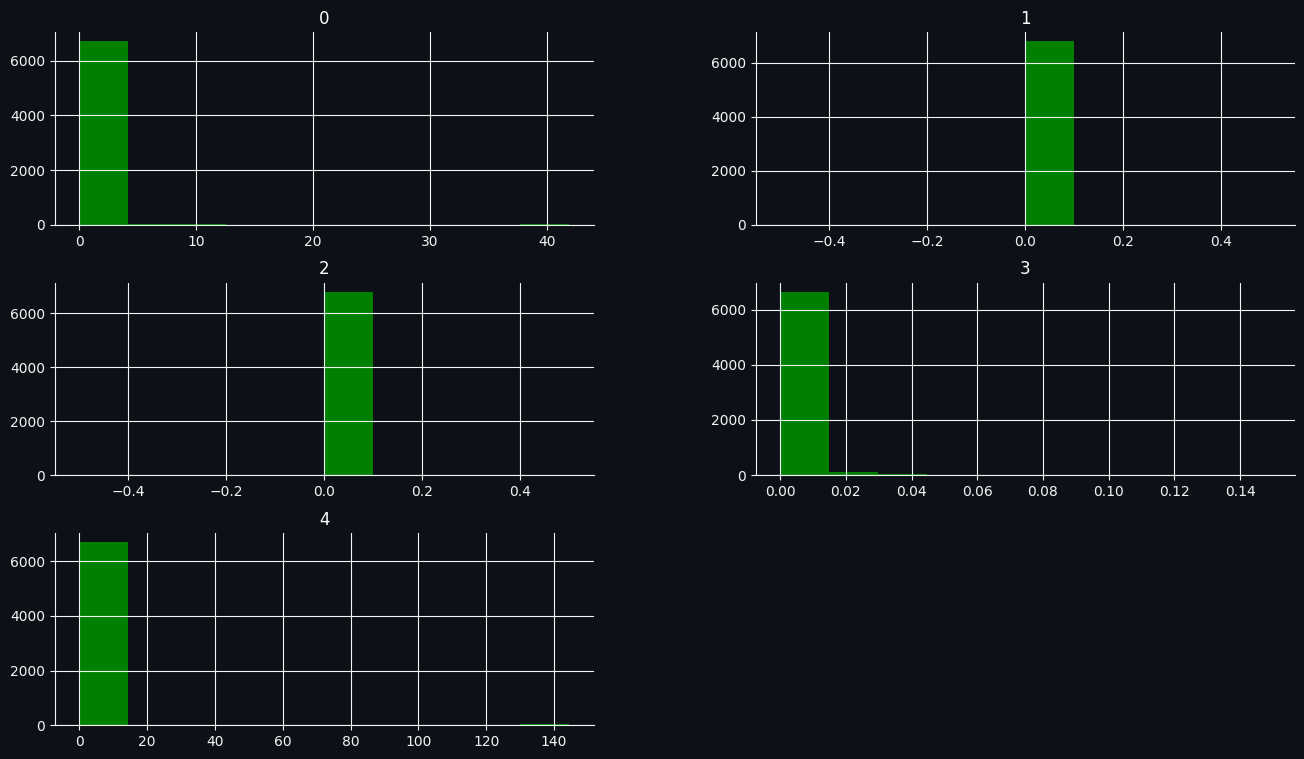

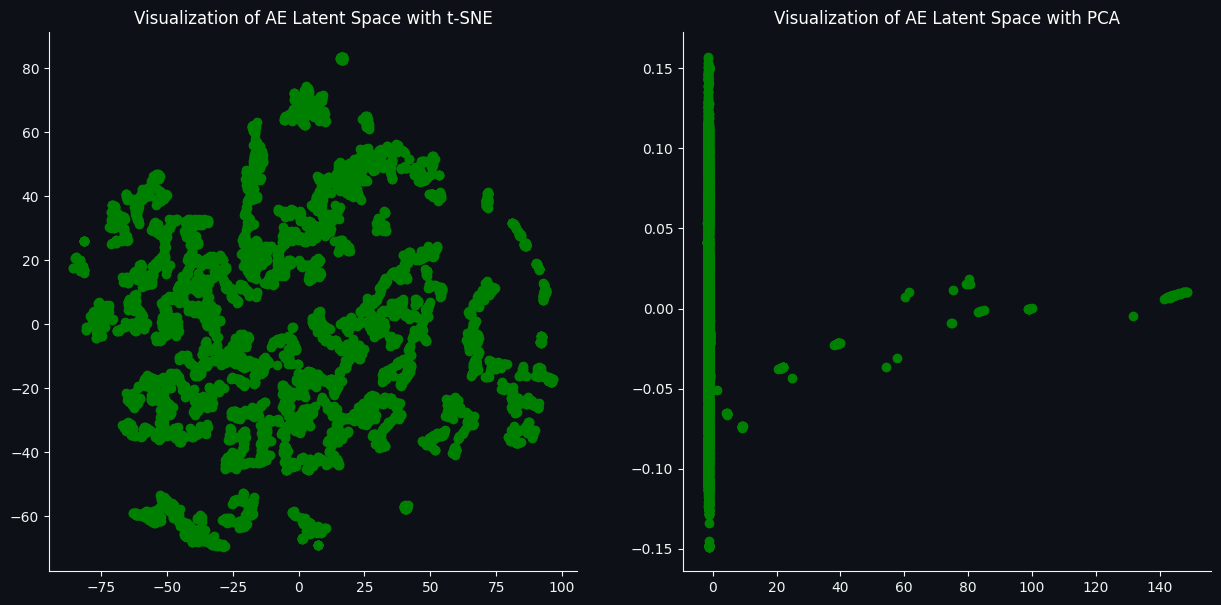

In [15]:
dim3 = plot_hist("../../ae_500_lsp_5.pth")

In [ ]:
dim3 = plot_hist("../../ae_500_lsp_5_sig.pth")

In [9]:
dim2 = plot_hist("../../ae_200_lsp_2.pth")

: 